In [2]:
import os
import sys
from scoring_functions import tanimoto
#from optimizer import Oracle
from utils import Variable, seq_to_smiles, unique
from tdc import Oracle
from rdkit import Chem
from rdkit.Chem import Draw
from scoring_functions import logP
import numpy as np
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors

In [ ]:
from rdkit import DataStructs
from rdkit.Chem import AllChem

smi1 = "c1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F"
m1 = Chem.MolFromSmiles(smi1)
smi2 = "O=S(=O)(Nc1cnccc1C(F)(F)F)c1ccccc1"
m2 = Chem.MolFromSmiles(smi2)
fp1 = AllChem.GetMorganFingerprint(m1, 2, useCounts=True, useFeatures=True)
fp2 = AllChem.GetMorganFingerprint(m2, 2, useCounts=True, useFeatures=True)
score = DataStructs.TanimotoSimilarity(fp1, fp2)


In [ ]:
print(score)

0.47619047619047616


In [ ]:
score = min(score, 0.7) / 0.7

In [ ]:
score

0.6802721088435374

In [ ]:
oracle = Oracle(name = 'QED')
oracle([smi1,smi2])

[0.7721421737961394, 0.9480925742394771]

In [ ]:
oracle = Oracle(name = 'LogP')
oracle([smi1,smi2])

Found local copy...


[1.8448273254812726, 1.6969031661299834]

In [ ]:
oracle('CC(C)(C)[C@H]1CCc2c(sc(NC(=O)COc3ccc(Cl)cc3)c2C(N)=O)C1')

2.126496327138913

In [ ]:
from rdkit.Chem import Descriptors

In [ ]:
m = Chem.MolFromSmiles('CC(C)(C)[C@H]1CCc2c(sc(NC(=O)COc3ccc(Cl)cc3)c2C(N)=O)C1')
logp_m=Descriptors.MolLogP(m)

In [ ]:
logp_m

4.668900000000003

In [ ]:
print(Descriptors.MolLogP(m1))
print(Descriptors.MolLogP(m2))

3.2055000000000007
2.901200000000001


In [ ]:
vals = Descriptors.CalcMolDescriptors(m)
print(vals)

{'MaxAbsEStateIndex': 12.35634470094622, 'MaxEStateIndex': 12.35634470094622, 'MinAbsEStateIndex': 0.1597052941546988, 'MinEStateIndex': -0.4994182518686483, 'qed': 0.7369335974098528, 'SPS': 16.357142857142858, 'MolWt': 420.9620000000001, 'HeavyAtomMolWt': 395.76200000000017, 'ExactMolWt': 420.12744134, 'NumValenceElectrons': 150, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.26242636944321274, 'MinPartialCharge': -0.48377161048632433, 'MaxAbsPartialCharge': 0.48377161048632433, 'MinAbsPartialCharge': 0.26242636944321274, 'FpDensityMorgan1': 1.2857142857142858, 'FpDensityMorgan2': 1.9642857142857142, 'FpDensityMorgan3': 2.5714285714285716, 'BCUT2D_MWHI': 35.49569209210921, 'BCUT2D_MWLOW': 9.720124700858268, 'BCUT2D_CHGHI': 2.3307633230082234, 'BCUT2D_CHGLO': -2.3339435530835377, 'BCUT2D_LOGPHI': 2.4363547242236874, 'BCUT2D_LOGPLOW': -2.268891901625434, 'BCUT2D_MRHI': 7.165448059463342, 'BCUT2D_MRLOW': -0.11761322142325031, 'AvgIpc': 2.9712366647565758, 'BalabanJ': 1.7271429924536323

In [ ]:
oracle = Oracle(name = 'QED')
oracle('CC(C)(C)[C@H]1CCc2c(sc(NC(=O)COc3ccc(Cl)cc3)c2C(N)=O)C1')

0.7369335974098528

In [ ]:
from scoring_functions import logP
scores = logP()
s = scores.__call__([smi1,smi2])


In [ ]:
print(s)

[0.0, 1.0]


In [ ]:
s = scores.__call__(['CC(C)(C)[C@H]1CCc2c(sc(NC(=O)COc3ccc(Cl)cc3)c2C(N)=O)C1'])
print(s)

[0.0]


In [ ]:
smi3 = "Cc1ccc(cc1)c2cc(nn2c3ccc(cc3)S(=O)(=O)N)C(F)(F)F"
s = np.array(scores.__call__([smi3]))
print(s)
m = Chem.MolFromSmiles(smi3)
logp_m=Descriptors.MolLogP(m)
print(logp_m)

[0.]
3.5139200000000015


In [ ]:
from scoring_functions import tanimoto
import numpy as np
t = tanimoto()
score_tanimoto = np.array(t.__call__([smi3]))
print(score_tanimoto)


[-0.13746631]


In [ ]:
smi4 = "Cc1cccc(S(=O)(=O)NC(=O)c2cc(C)ccc2C)c1"
m4 = Chem.MolFromSmiles(smi4)
img4 = Draw.MolToImage(m4)


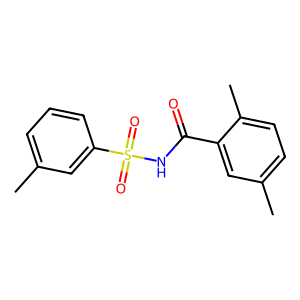

In [ ]:
img4

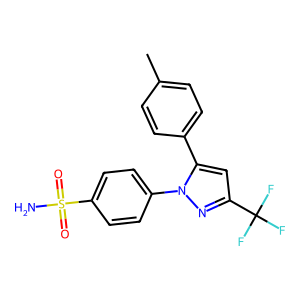

In [ ]:
smi_q = "C1(S(N)(=O)=O)=CC=C(N2C(C3=CC=C(C)C=C3)=CC(C(F)(F)F)=N2)C=C1"
smi5 = "NC(=O)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1"

mq = Chem.MolFromSmiles(smi_q)
img_q = Draw.MolToImage(mq)
img_q

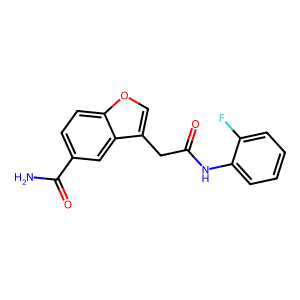

In [ ]:
m5 = Chem.MolFromSmiles(smi5)
img5 = Draw.MolToImage(m5)
img5

In [ ]:
fp1 = AllChem.GetMorganFingerprint(mq, 2, useCounts=True, useFeatures=True)
fp2 = AllChem.GetMorganFingerprint(m5, 2, useCounts=True, useFeatures=True)
score = DataStructs.TanimotoSimilarity(fp1, fp2)

In [ ]:
print(score)

0.7837837837837838


In [ ]:
print(Descriptors.MolLogP(mq))
print(Descriptors.MolLogP(m5))

5.050600000000004
2.852000000000001


In [ ]:
oracle = Oracle(name = 'QED')
oracle([smi5,smi_q])

[0.7764902713770766, 0.7319008436872338]

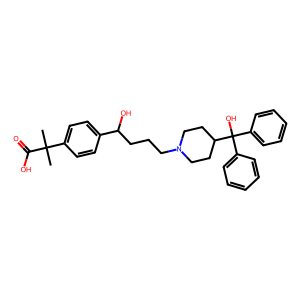

In [9]:
Fexofenadine = "CC(C)(C1=CC=C(C=C1)C(CCCN2CCC(CC2)C(C3=CC=CC=C3)(C4=CC=CC=C4)O)O)C(=O)O"

smi = '[N-]C(O)c1cccc(CN2CCC(C(O)(c3ccccc3)c3ccccc3)CC2)c1'
mq = Chem.MolFromSmiles(Fexofenadine)
img_q = Draw.MolToImage(mq)
img_q

In [10]:
m = Chem.MolFromSmiles(smi)
img = Draw.MolToImage(m)
img

ValueError: Null molecule provided

In [6]:
fp1 = AllChem.GetMorganFingerprint(mq, 2, useCounts=True, useFeatures=True)
fp2 = AllChem.GetMorganFingerprint(m, 2, useCounts=True, useFeatures=True)
score = DataStructs.TanimotoSimilarity(fp1, fp2)
print(score)

0.7142857142857143


In [7]:
print(Descriptors.MolLogP(mq))
print(Descriptors.MolLogP(m))

5.5105000000000075
4.663600000000004


In [8]:
oracle = Oracle(name = 'QED')
oracle([Fexofenadine,smi])

[0.341305921033457, 0.632205610774712]